In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

In [14]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

In [3]:
wine = load_wine()
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
wine_df['Class'] = wine['target']
wine_df['Class'] = wine_df['Class'].map(dict(zip(np.unique(wine['target']), wine['target_names'])))
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


<AxesSubplot:>

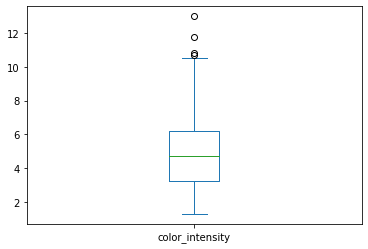

In [7]:
wine_df['color_intensity'].plot.box()

In [10]:
quartile_1, quartile_3 = np.percentile(wine_df['color_intensity'], [25, 75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + (iqr * 1.5)
lower_whis = quartile_1 - (iqr * 1.5)
upper_whis, lower_whis

(10.670000000000002, -1.2500000000000009)

<AxesSubplot:>

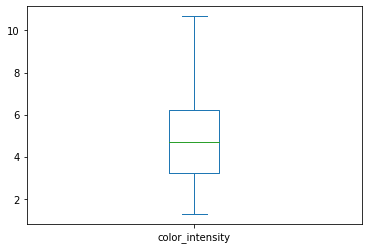

In [12]:
(wine_df['color_intensity']
.clip(upper=upper_whis, lower=lower_whis)
.plot.box()
)

In [15]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['Class'] = iris['target']
iris_df['Class'] = iris_df['Class'].map(dict(zip(np.unique(iris['target']), iris['target_names'])))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
iris_dummy = pd.get_dummies(iris_df, columns=['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_setosa,Class_versicolor,Class_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [18]:
iris_df2 = iris_df.iloc[:, 0:-1]
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris_df2, iris_df['Class'], stratify=iris_df['Class'], test_size=0.2, random_state=0)

In [23]:
X_train.shape

(120, 4)

In [26]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled.min()

-2.356839145541654

In [29]:
scaler2 = MinMaxScaler().fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

In [30]:
X_train_scaled2.mean()

0.44972634180790955

In [31]:
scaler.inverse_transform(X_train_scaled)

array([[4.8, 3. , 1.4, 0.3],
       [4.9, 3. , 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 2.5, 5.8, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.6, 3.6, 1. , 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 2.5, 3. , 1.1],
       [5.6, 2.5, 3.9, 1.1],
       [5. , 3.4, 1.6, 0.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.2, 3.2, 6. , 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.1, 3. , 4.6, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 2

In [34]:
pca = PCA(n_components=2).fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_train_scaled_pca

array([[-2.07488885, -0.63090907],
       [-2.08726976, -0.59579233],
       [-2.43000856, -0.80621736],
       [-2.21224432,  0.28512609],
       [ 0.19654148, -0.75472186],
       [-2.49116323,  0.65449191],
       [ 1.9317783 , -0.73720317],
       [ 1.68293941,  0.95817613],
       [ 1.16642315, -0.9340298 ],
       [ 0.99099314,  0.05004963],
       [ 0.93233282, -0.03172613],
       [ 0.24495489, -0.82873127],
       [-2.0246351 ,  1.5157449 ],
       [-0.54168421, -1.77974085],
       [ 3.22843302, -0.06402209],
       [ 1.86949291,  0.63048131],
       [-2.54703164,  1.82869014],
       [ 0.19713269, -0.36782812],
       [ 0.73611813,  0.7468144 ],
       [-2.12090266,  0.36789946],
       [ 1.83074069,  0.25364501],
       [-2.73353063,  0.53161379],
       [-2.14313817,  0.57840589],
       [ 1.98326897,  0.55846711],
       [ 1.84433878,  0.36953991],
       [-0.49622965, -1.48268511],
       [ 0.10795979, -1.26427924],
       [-2.03077818,  0.29966119],
       [ 1.42650942,